In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

class CNN_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Conv2d(1, 32, kernel_size=3, padding=2)
        self.layer2 = nn.Conv2d(32, 32, kernel_size=3, padding=2)
        self.layer3 = nn.Conv2d(32, 64, kernel_size=3, padding=2)
        self.layer4 = nn.Conv2d(64, 64, kernel_size=3, padding=2)
        
        self.fc1 = nn.Linear(10*10*64, 256)
        self.fc2 = nn.Linear(256, 10)
    
    def forward(self,x):
        #convo layer 1
        x = self.layer1(x)
        x = F.relu(x)
        
        #convo layer 2
        x = self.layer2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        #convo layer 3
        x = self.layer3(x)
        x = F.relu(x)
        
        #convo layer 4
        x = self.layer4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        #fc 1
        x = x.view(-1,10*10*64)
        x = self.fc1(x)
        x = F.relu(x)
        
        #fc 2
        x = self.fc2(x)
        
        return x

In [2]:
train_data = datasets.MNIST(root="./dataset", train=True, transform=transforms.ToTensor(), download=False)
test_data = datasets.MNIST(root="./dataset", train=False, transform=transforms.ToTensor(), download=False)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True)


In [3]:
model = CNN_Model()
model = model.cuda()
torch.cuda.memory_allocated()

6827008

In [4]:


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#training
for epochs in range(3):
    for image,label in tqdm(train_loader):
        image, label = image.cuda(), label.cuda()
        optimizer.zero_grad()
        x = image
        y = model(x)
        loss = criterion(y,label)
        loss.backward()
        optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

In [5]:
# Testing
correct = 0
total = len(test_data)

with torch.no_grad():
    for images,labels in tqdm(test_loader):
        images, labels = images.cuda(), labels.cuda()
        x = images
        y = model(x)
        prediction = torch.argmax(y, dim=1)
        correct+=torch.sum((prediction==labels).float())
        
print(f"Accuracy= {(correct/total)*100}%")

  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy= 98.8899917602539%


In [6]:
# 2 cells below this cell are for checking visually how our model performs
# add index to load image and label in MNIST test_data
# you will get the image and true label corresponding to the image
# after running the next cell you will get the label predicted by our model

true lable: 4


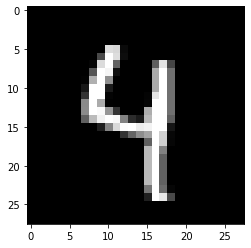

In [7]:
import matplotlib.pyplot as plt

im,lb = test_data[5200]
im = im.reshape([28,28])
plt.imshow(im, cmap='gray')
print("true lable: {}".format(lb))

In [8]:
x = im.view(1,1,28,28)
x = x.cuda()
y = model(x)
prediction = torch.argmax(y,dim=1)
print("predicted label: {}".format(prediction))

predicted label: tensor([4], device='cuda:0')
